Video Link: https://drive.google.com/file/d/1WJE_cxBzNEkzzqsbCRtql8DKCPKyCstR/view?usp=sharing

References:

https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python

https://note.nkmk.me/en/python-opencv-pillow-image-size/

https://drive.google.com/file/d/1TDY6d2VvJ2A44Rke35BR3Wh1kx1GbKVj/view

https://drive.google.com/file/d/1aMtPshbschx0apV8YwOQtzek6VaqpPVf/view

https://drive.google.com/file/d/1STKK4w3wAbHNCkI9idvV5KgFfV6mcH0u/view


Importing our libraries for Use

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading the image from the dataset and cropping

Developer: Muhammad 19I-0561

Text(0.5, 1.0, 'Roll Number options')

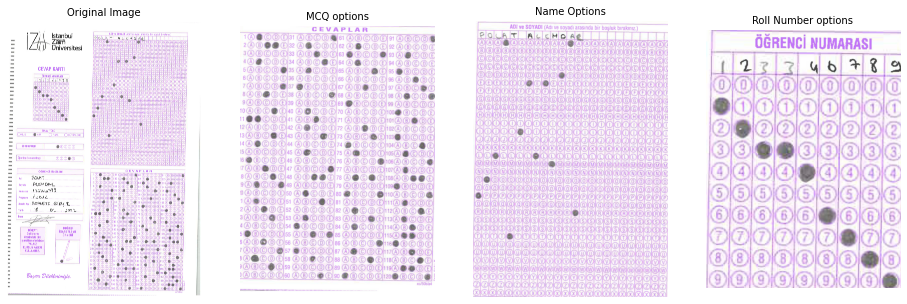

In [49]:
path = r"C:\Danyal\Work\FAST\Semester 5\Digital Image Processing\Project\Optical-Mark-Recognition\Dataset\unnamed (4).jpg"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
# TODO : Reading the image again in coloured mode
img_color = cv2.imread(path,cv2.IMREAD_COLOR)
# TODO : Image cropping
img_color_MCQ = img_color[3770:7200, 2141:4500]
img_color_Name = img_color[258:3671, 2141:4544]
img_color_Roll = img_color[1342:2537, 657:1553]

# TODO : Now cropping the same images for grayscale

img_color_Name_gray = img[258:3671, 2141:4544]
img_color_Roll_gray = img[1342:2537, 657:1553]
img_color_MCQ_gray = img[3770:7200, 2141:4500]


# TODO : Displaying the images
fig, axs = plt.subplots(1,4,figsize=(16,16))

axs[0].imshow(img_color, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
axs[1].imshow(img_color_MCQ, cmap='gray')
axs[1].axis('off')
axs[1].set_title('MCQ options',fontsize='medium')
axs[2].imshow(img_color_Name, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Name Options',fontsize='medium')
axs[3].imshow(img_color_Roll, cmap='gray')
axs[3].axis('off')
axs[3].set_title('Roll Number options',fontsize='medium')

Applying Contours and getting bounding rectangles

Developer: Mehmood Amjad 19I-0472

Text(0.5, 1.0, 'Morphological Processing')

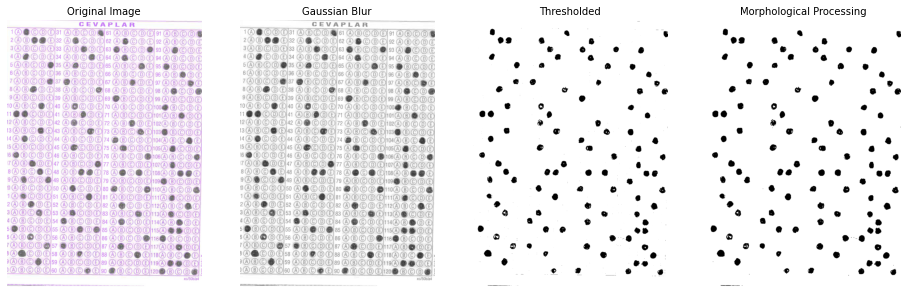

In [50]:
# TODO : Applying Gaussian Blue and thresholding to get desired results
img2 = cv2.GaussianBlur(img_color_MCQ_gray,(3,3),1,0)
thresh, out = cv2.threshold(img2,150,255,cv2.THRESH_BINARY)
# TODO : Applying dilation first since image not negative
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(out,kernel,iterations = 1)

# TODO : Applying erosion with a different kernel
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)

# TODO : Displaying our image
fig, axs = plt.subplots(1,4,figsize=(16,16))

axs[0].imshow(img_color_MCQ, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
axs[1].imshow(img2, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Gaussian Blur',fontsize='medium')
axs[2].imshow(out, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Thresholded',fontsize='medium')
axs[3].imshow(erosion, cmap='gray')
axs[3].axis('off')
axs[3].set_title('Morphological Processing',fontsize='medium')

Calculating the dimensions of each window and cropping image accordingly

Developer: Danyal Faheem 19I-2014

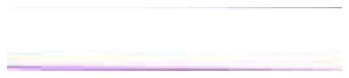

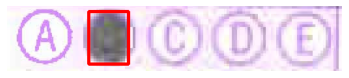

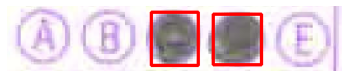

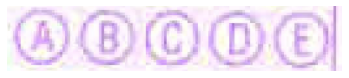

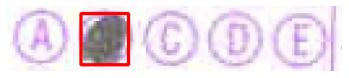

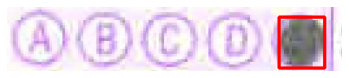

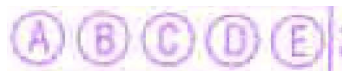

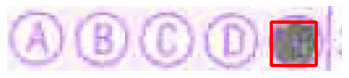

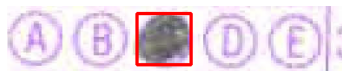

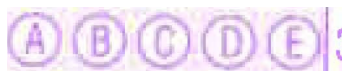

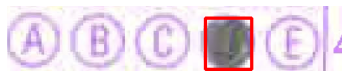

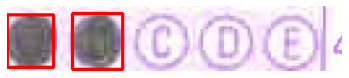

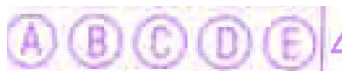

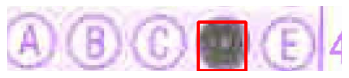

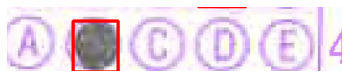

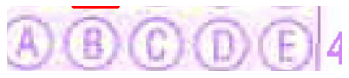

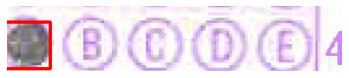

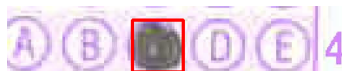

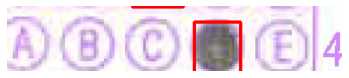

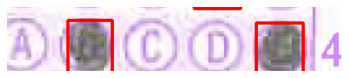

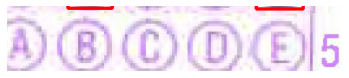

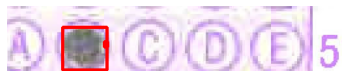

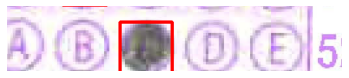

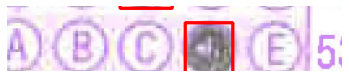

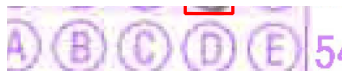

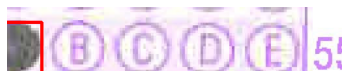

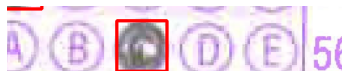

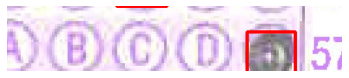

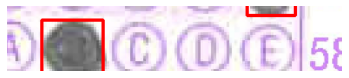

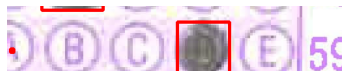

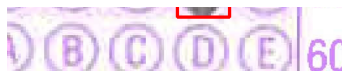

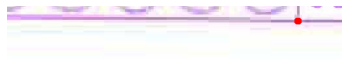

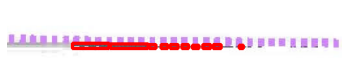

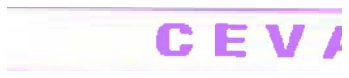

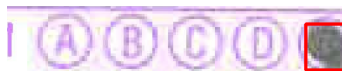

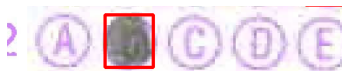

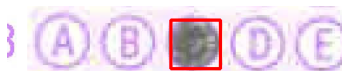

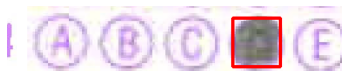

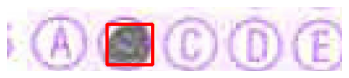

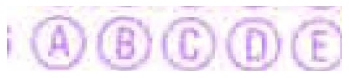

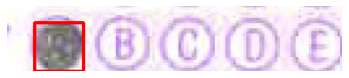

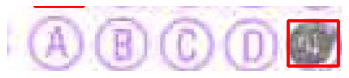

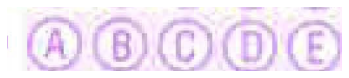

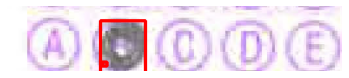

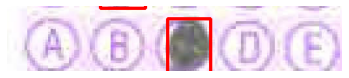

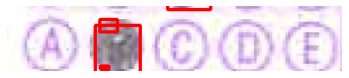

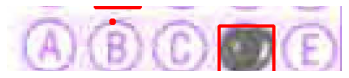

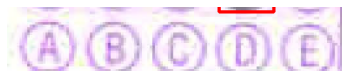

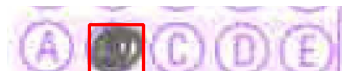

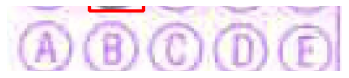

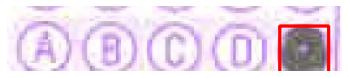

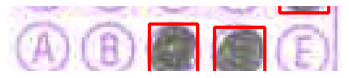

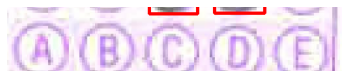

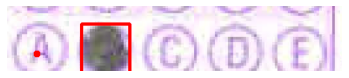

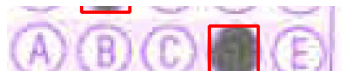

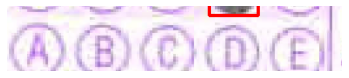

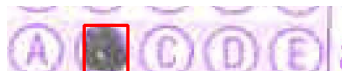

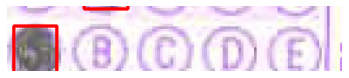

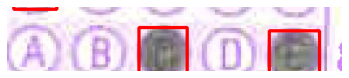

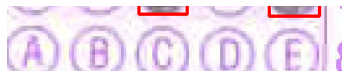

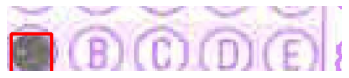

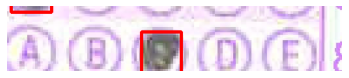

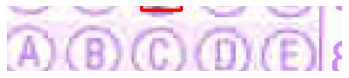

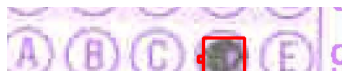

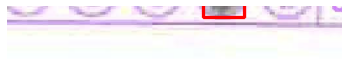

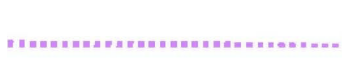

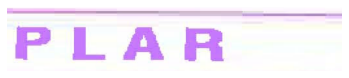

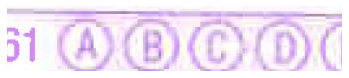

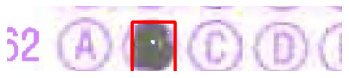

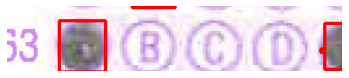

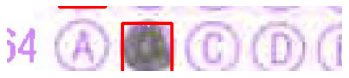

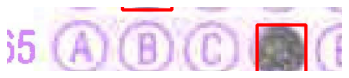

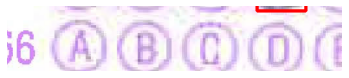

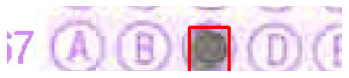

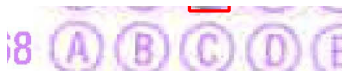

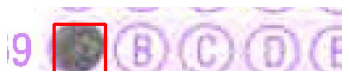

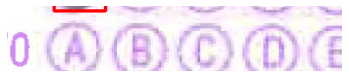

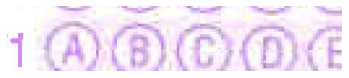

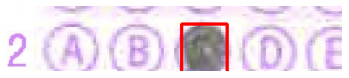

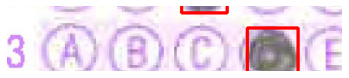

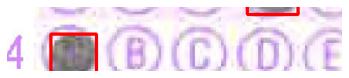

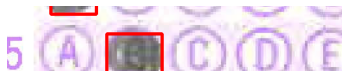

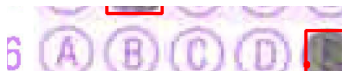

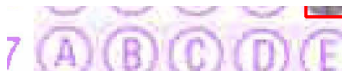

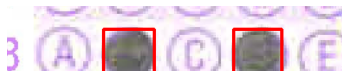

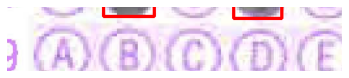

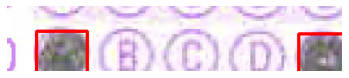

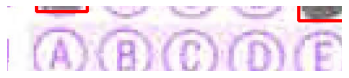

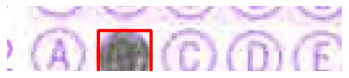

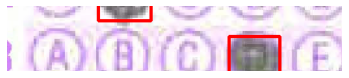

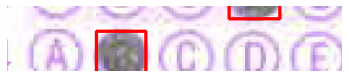

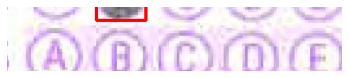

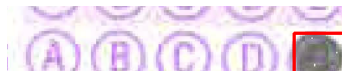

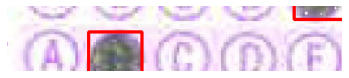

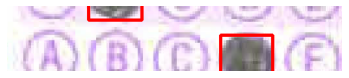

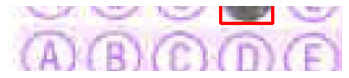

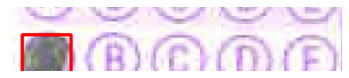

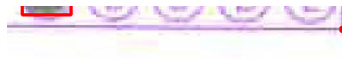

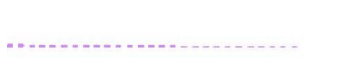

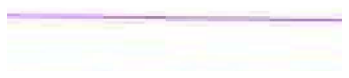

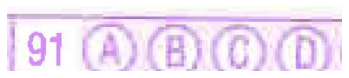

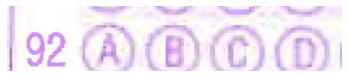

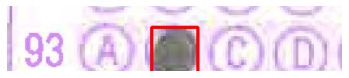

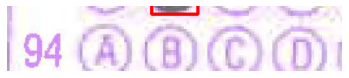

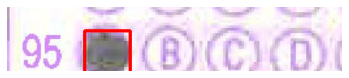

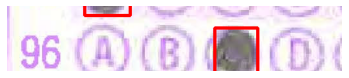

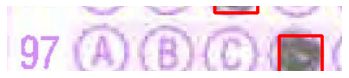

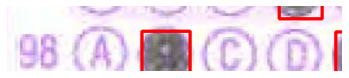

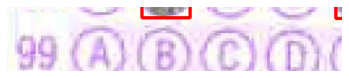

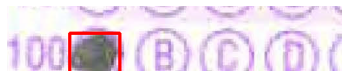

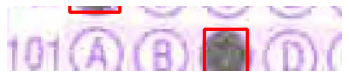

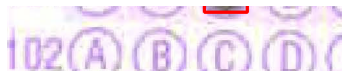

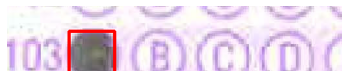

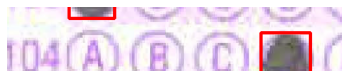

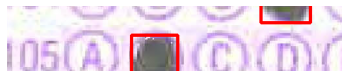

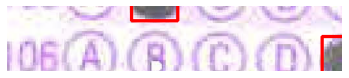

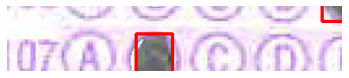

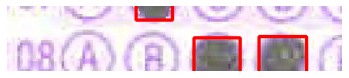

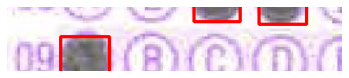

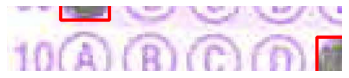

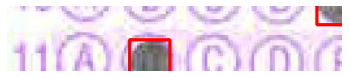

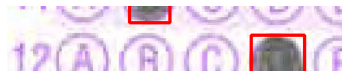

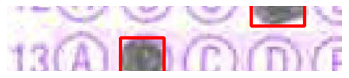

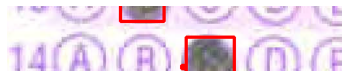

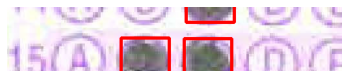

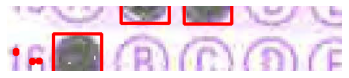

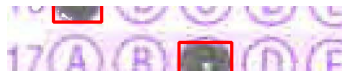

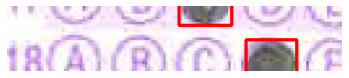

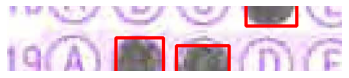

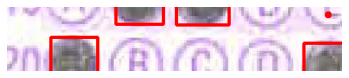

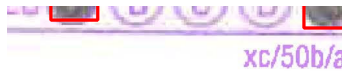

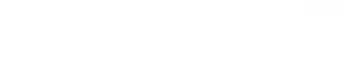

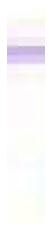

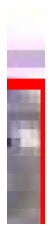

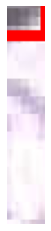

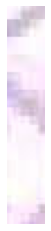

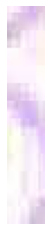

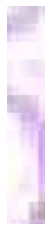

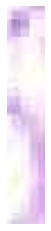

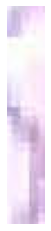

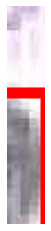

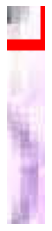

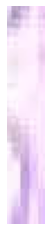

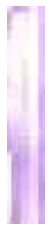

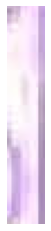

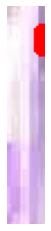

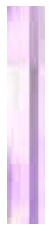

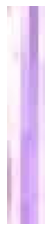

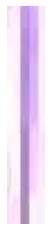

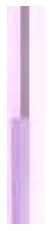

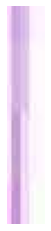

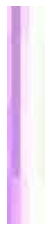

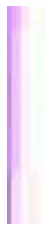

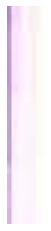

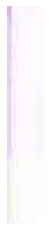

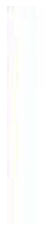

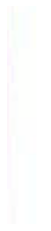

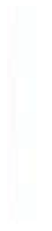

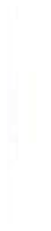

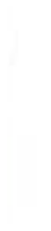

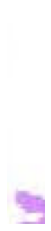

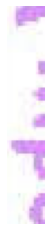

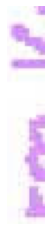

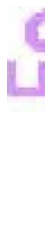

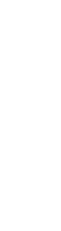

In [51]:
# TODO : Applying Gaussian Blue and thresholding to get desired results
img2 = cv2.GaussianBlur(img_color_MCQ_gray,(3,3),1,0)
thresh, out = cv2.threshold(img2,150,255,cv2.THRESH_BINARY)
# TODO : Applying dilation first since image not negative
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(out,kernel,iterations = 1)

# TODO : Applying erosion with a different kernel
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)

# TODO : Function to calculate Median value of a list
def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0
        
# TODO : Taking negative of our image to get the contours
erosion = erosion - 255

width = []
height = []

# TODO : Calculating contorus of our processed image
contours, hierarchy = cv2.findContours(erosion,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# TODO : Calculating Bounding Rectangles and drawing them
for i in range(len(contours)):
    if (cv2.contourArea(contours[i]) > 0):
        x,y,w,h = cv2.boundingRect(contours[i])
        # TODO : Appending the width and height since we need them later
        width.append(w)
        height.append(h)
        cv2.rectangle(img_color_MCQ, (x, y), (x+w, y+h), (255, 0, 0), 4)

# TODO : Calculating the width of one row of MCQs
# TODO : One row of MCQs has 5 options, taking median of width of all and therefore creating one row witdh
row_width = (median(width) * 7) + (median(width) * 0.25)

# TODO : Calculating the height of one row of MCQs
# TODO : One row of MCQs has 1 options, taking median of height of all and therefore creating one row height
row_height = median(height) + (median(height) * 0.3)

rows = []

# TODO : Getting the resolution of our image
img_height, img_width, colors = img_color_MCQ.shape
x = 78 
y = 85

# TODO : Running a loop to crop our rows according to row width and height
while x < img_width:
    y = 0
    while y < img_height:
        # TODO : Crop the image accordinly
        new_image = img_color_MCQ[int(y): int(y + row_height), int(x): int(x + row_width)]
        # TODO : Appending images for use later
        rows.append(new_image)
        # TODO : Displaying each row
        plt.imshow(new_image, cmap='gray')
        plt.axis('off')
        plt.show()
        y += row_height
    # TODO : Adding row width to change the column as we have 4 columns
    x += row_width + (row_width * 0.1)



Now applying the same on the Roll Number part

Developer: Danyal Faheem 19I-2014

In [52]:
# TODO : Applying Gaussian Blue and thresholding to get desired results
img3 = cv2.GaussianBlur(img_color_Roll_gray,(3,3),1,0)
thresh, out = cv2.threshold(img3,150,255,cv2.THRESH_BINARY)
# TODO : Applying dilation first since image not negative
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(out,kernel,iterations = 1)

# TODO : Applying erosion with a different kernel
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)

# TODO : Function to calculate Median value of a list
def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0
        
# TODO : Taking negative of our image to get the contours
erosion = erosion - 255

width = []
height = []

# TODO : Calculating contorus of our processed image
contours, hierarchy = cv2.findContours(erosion,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# TODO : Calculating Bounding Rectangles and drawing them
for i in range(len(contours)):
    if (cv2.contourArea(contours[i]) > 0):
        x,y,w,h = cv2.boundingRect(contours[i])
        # TODO : Appending the width and height since we need them later
        width.append(w)
        height.append(h)
        cv2.rectangle(img_color_Roll, (x, y), (x+w, y+h), (255, 0, 0), 4)

# TODO : Calculating the width of one row of MCQs
# TODO : Appending the width and height since we need them later
row_width = (median(width))

# TODO : Calculating the height of one row of MCQs
# TODO : One row of MCQs has 1 options, taking median of height of all and therefore creating one row height
row_height = (median(height) * 18) + (median(height) * 0.3)

rows = []

# TODO : Getting the resolution of our image
img_height, img_width, colors = img_color_Roll.shape
x = 50
y = 75

# TODO : Running a loop to crop our rows according to row width and height
while x < img_width:
        # TODO : Crop the image accordinly
        new_image = img_color_Roll[int(y): int(y + row_height), int(x): int(x + row_width)]
        rows.append(new_image)
        plt.imshow(new_image, cmap='gray')
        plt.axis('off')
        plt.show()
        x += row_width + (row_width * 0.1)